### Final Project | Music & Mental Health (2)

In [18]:
# Load libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [19]:
# Read cleaned dataset

data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv')
data_mmh.head()

,Unnamed: 0,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [20]:
data_mmh.shape

(617, 32)

In [21]:
# What to do with "Unnamed column"

#Remove the Unnamed Column: 
#data = pd.read_csv('your_dataset.csv', index_col=0)

#data = data.drop(columns=['Unnamed: 0'])

#Rename the Unnamed Column:
#data = data.rename(columns={'Unnamed: 0': 'ID'})

#Retain as an Index:
#data = pd.read_csv('your_dataset.csv', index_col=0)

#Check the Origin of the Column:

In [22]:
#Remove the Unnamed Column: 
#data_mmh = pd.read_csv('data_mmh_cleaned1.csv', index_col=0)
data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv', index_col=0)
data_mmh.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


### Data Transformation / Data Visualisation / Feature Engineering

* What **aggregations** to do?
* What **plots** to visualize? --> matplotlib + seaborn + kaggle


### Trying to predict music effects:

1) What is the connection between **music use** and its effect on **disease**(mental health)?
2) What is the connection between **music preference** and effect on **disease**(mental health)? 
* Granularity --> fav genre as first, related statistcal, individualy fre compare to disease
3) What is the connection between **music genre** and effect on **disease**(mental health)?
4) Which **disease**(mental health) experiences the **greatest effect** from music? 
* Plot difference between mental health and anxiety
5) Can I make helpful recommendations based on these findings? 
6) What **age** (range) experiences the most the **diseases**. What is there music effect? What music genre do they listen to?
What is there music use?

--> What is the **mean** anxiety (1.0-10.0) level (numerical) for **every possible music effect** (Improve, No effect, Worsen)(categorical)
* More than 2 poss valuebale --> statistical test

_________

- Calculate the right things
- Plot these questions
In order to plot you first need to calculate the right thing.

- Plot when visualization is relevant

In [ ]:
# 1) What is the connection between **music use** and its effect on **disease**(mental health)?
# Get "music use"

**music use**

Hours per day 
While working
Instrumentalist
Composer 

**disease**

Anxiety
Depression
Insomnia
OCD


In [8]:
#netflix_movies.pivot_table(index="title",columns="type",values="show_id",aggfunc=sum) # wide format table
data_mmh.pivot_table(index="Anxiety",columns="Music effects",values="Age",aggfunc=sum) # wide format table

/var/folders/1t/xp0_q_jn0_xd2c4cl073hdrw0000gn/T/ipykernel_97439/285586802.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_mmh.pivot_table(index="Anxiety",columns="Music effects",values="Age",aggfunc=sum) # wide format table


Music effects,Improve,No effect,Worsen
Anxiety,,,
0.0,585.0,474.0,NaN
1.0,633.0,305.0,NaN
2.0,830.0,440.0,14.0
3.0,954.0,669.0,65.0
4.0,1155.0,221.0,13.0
5.0,1099.0,315.0,38.0
6.0,1567.0,423.0,21.0
7.0,2329.0,361.0,68.0
7.5,16.0,NaN,NaN


In [9]:
data_mmh.pivot_table(index="Music effects",columns="Anxiety",values="Age",aggfunc=sum) # wide format table

/var/folders/1t/xp0_q_jn0_xd2c4cl073hdrw0000gn/T/ipykernel_97439/1650810559.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_mmh.pivot_table(index="Music effects",columns="Anxiety",values="Age",aggfunc=sum) # wide format table


Anxiety,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,7.5,8.0,9.0,10.0
Music effects,,,,,,,,,,,,
Improve,585.0,633.0,830.0,954.0,1155.0,1099.0,1567.0,2329.0,16.0,2007.0,988.0,1107.0
No effect,474.0,305.0,440.0,669.0,221.0,315.0,423.0,361.0,NaN,577.0,347.0,311.0
Worsen,NaN,NaN,14.0,65.0,13.0,38.0,21.0,68.0,NaN,77.0,NaN,89.0


In [ ]:
#netflix_movies[["type","title"]].groupby("type").sum().head() # using groupby
#data_mmh[["Music effect", "Hours per day "]].groupby("Music effect").sum().head() # using groupby

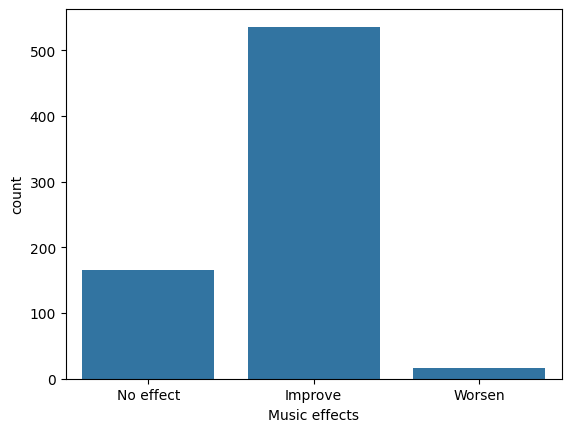

In [10]:
df = pd.DataFrame(data_mmh)

sns.countplot(data=df, x='Music effects')
plt.title('')
plt.show()

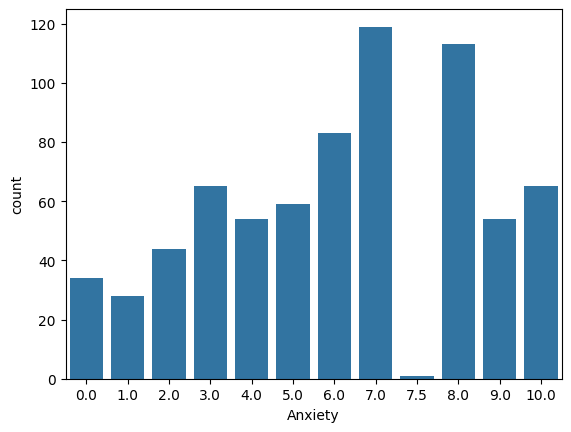

In [13]:
df = pd.DataFrame(data_mmh)

sns.countplot(data=df, x='Anxiety')
plt.title('')
plt.show()

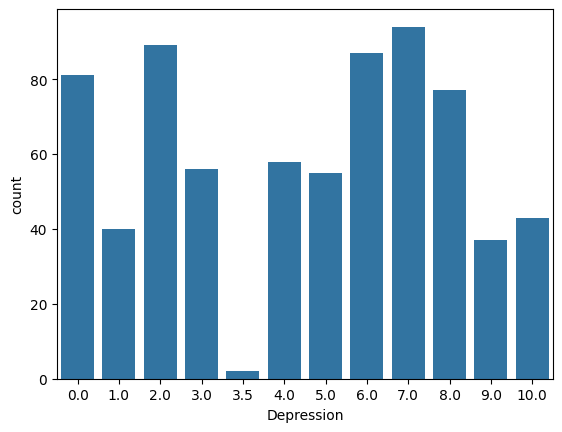

In [14]:
df = pd.DataFrame(data_mmh)

sns.countplot(data=df, x='Depression')
plt.title('')
plt.show()

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

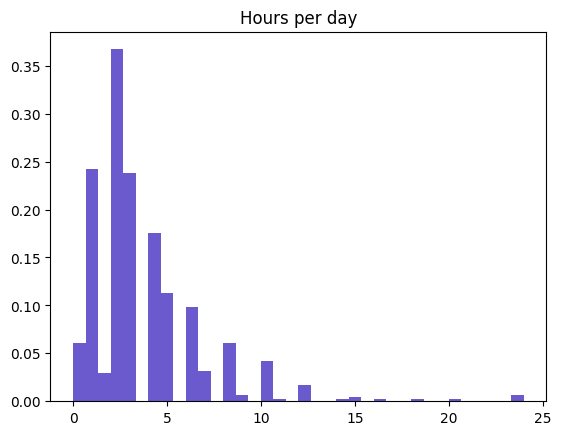

In [12]:
data_mmh.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [ ]:
2) What is the connection between **music preference** and effect on **disease**(mental health)? 
granularity --> fav genre as first, related statistcal, individualy fre compare to disease

**music preference**

Favorite genre (categorical)
Exploratory (categorical)
Foreign languages (categorical)
BPM (numerical)

**disease**

Anxiety 
Depression
Insomnia
OCD

In [ ]:
3) What is the connection between **music genres** and effect on **disease**(mental health)?

**music genres**
Favorite genre

* Frequency genre
Frequency [Classical]             
Frequency [Country]               
Frequency [EDM]                   
Frequency [Folk]                  
Frequency [Gospel]               
Frequency [Hip hop]               
Frequency [Jazz]                  
Frequency [K pop]               
Frequency [Latin]                 
Frequency [Lofi]                  
Frequency [Metal]              
Frequency [Pop]                
Frequency [R&B]                   
Frequency [Rap]                  
Frequency [Rock]                
Frequency [Video game music]  

**disease**

Anxiety
Depression
Insomnia
OCD

In [ ]:
4) Which **disease**(mental health) experiences the **greatest effect** from music? 
Plot difference between mental health and anxiety

**disease**

Anxiety
Depression
Insomnia
OCD

**greatest effect from music **
Improve
No effect
Worsen

In [ ]:
5) Can I make a helpful recommendations based on these findings? 

In [ ]:
6) What **age** experiences the most the **diseases**.
What is their **music effect**? What **music** do they listen to?


**age**
**diseases**

**music effect**

**frequency genre**